<center>
    <h1> 
        Teste de Hipótese 1.2: Tentando Melhorar Imagens Coloridas Aumetando o Brilho
    </h1>
</center>
    <div style="text-align: right;"><h3>
        Carlos Eduardo Cassimiro da Silva
    </h3></div>

O Teste 1.1 foi possível melhorar a nitidez dos de uma amostra de rg mais escura equalizando o histrama da mesma para melhorar o seu contraste, entretanto, para melhor classificação e distinção dos outros documentos, faz-se necessário melhorar ainda mais a nitidez desse tipo de amostra. Nesse teste, será verificado a possibilidade de melhorar a nitidez da imagem aumentando o brilho, e para isso testaremos diferentes tipos de ganho nos canais de cores, além de um teste de equalização de histograma com aumento de brilho juntos.</p>

<h4>Desafio #1: Classificação de documentos (RG, CNH e CPF) </h4>

 - Contextualização: Inúmeras áreas de diferentes organizações (usualmente como parte de um processo de um backoffice) recepcionam documentos dos seus clientes para formação de kits de documentação. Tais kits são, por exemplo, compartilhados com outros stakeholders das empresas. Conforme pode-se pressupor, um desafio nesse cenário refere-se ao fato de que o cliente pode enviar documentos, porém sem necessariamente indicar a qual tipo se o documento se refere (RG, CNH ou CPF, por exemplo). Dessa forma, ao invés de demandar um trabalho manual para essa leitura e classificação dos documentos, podemos construir um modelo de aprendizado que tenha capacidade de ler um conjunto de documentos (em .jpg, por exemplo) e, subsequentemente, realizar a classificação em três tipos distintos: RG, CNH e CPF.
 - Dataset: Para esse desafio utilizaremos um dataset público de RG, CNH e CPF (incluindo as imagens). Este repositório apresenta o conjunto de dados denominado Brazilian Identity Document Dataset (BID Dataset), o primeiro conjunto de dados público de documentos de identificação brasileiros. <br>
Link do dataset: https://github.com/ricardobnjunior/Brazilian-Identity-Document-Dataset

<h4>Roteiro</h4>
Módulos utilizados <br>
1. Comparação entre uma amostra boa e outra ruim <br>
2. Aumentando o Brilho das Imagens <br>
    2.1 Ganho Linear com Razão Percentual <br>
    2.2 Ganho Linear <br>
    2.3 Ganho Percentual <br>
3. Comparações <br>
4. Equalização CLAHE com Aumento de Brilho Percentual <br>
    4.1 Ganho Percentual Aplicado ao Equalização CLAHE <br>
    4.2 Equalização CLAHE Aplicado ao Ganho Percentual

##### Módulos utilizados

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

# 1. Comparação entre uma amostra boa e outra ruim

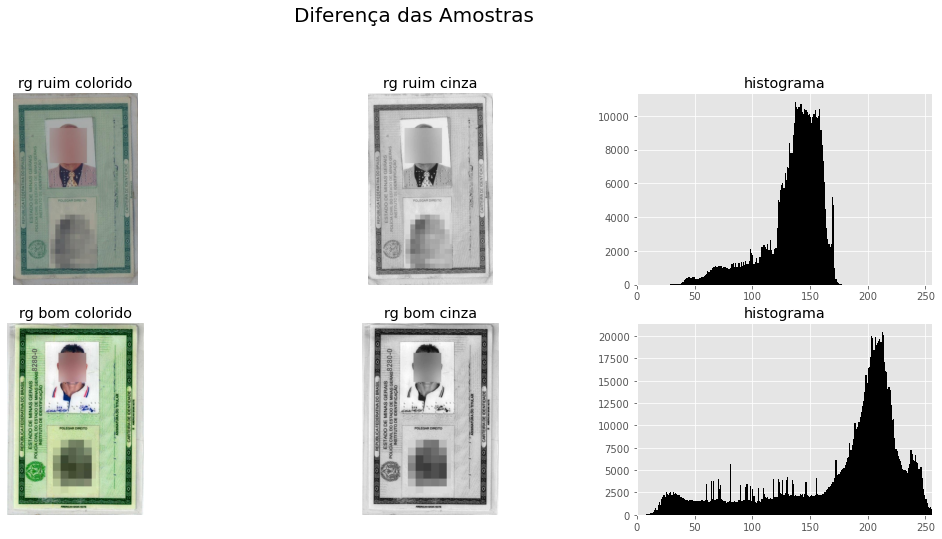

In [3]:
rg_ruim = cv2.cvtColor(cv2.imread('imagens_originais/rg_frente_2.jpg'), cv2.COLOR_BGR2RGB)
rg_ruim_cinza = cv2.cvtColor(rg_ruim, cv2.COLOR_RGB2GRAY)

rg_bom = cv2.cvtColor(cv2.imread('imagens_originais/rg_frente.jpg'), cv2.COLOR_BGR2RGB)
rg_bom_cinza = cv2.cvtColor(rg_bom, cv2.COLOR_RGB2GRAY)


fig = plt.figure(figsize=(18,12))

fig.add_subplot(3,3,1); plt.axis('off')
plt.title('rg ruim colorido')
plt.imshow(rg_ruim)

fig.add_subplot(3,3,2); plt.axis('off')
plt.title('rg ruim cinza')
plt.imshow(rg_ruim_cinza, cmap='gray')

fig.add_subplot(3,3,3)
plt.hist(rg_ruim_cinza.flatten(),256,[0,256], color = 'black')
plt.title('histograma')
plt.xlim([0,256])

fig.add_subplot(3,3,4); plt.axis('off')
plt.title('rg bom colorido')
plt.imshow(rg_bom)

fig.add_subplot(3,3,5); plt.axis('off')
plt.title('rg bom cinza')
plt.imshow(rg_bom_cinza, cmap='gray')

fig.add_subplot(3,3,6)
plt.hist(rg_bom_cinza.flatten(),256,[0,256], color = 'black')
plt.title('histograma')
plt.xlim([0,256])

fig.suptitle('Diferença das Amostras', fontsize=20)
plt.show();

# 2. Aumentando o Brilho das Imagens

In [4]:
def plot_histograms(img, name, title):
    hist_red = cv2.calcHist(img,[0],None,[256],[0,256])
    hist_green = cv2.calcHist(img,[1],None,[256],[0,256])
    hist_blue = cv2.calcHist(img,[2],None,[256],[0,256])
    
    fig = plt.figure(figsize=(14,7))

    fig.add_subplot(2,2,1); plt.axis('off')
    plt.title(name)
    plt.imshow(img)

    fig.add_subplot(2,2,2);
    plt.title('Canal Vermelho')
    plt.plot(hist_red,color='red',lw=2)

    fig.add_subplot(2,2,3);
    plt.title('Canal Verde')
    plt.plot(hist_green,color='green',lw=2)

    fig.add_subplot(2,2,4);
    plt.title('Canal Azul')
    plt.plot(hist_blue,color='blue',lw=2)

    fig.suptitle(title, fontsize=20)
    plt.show();

## 2.1 Ganho Linear com Razão Percentual

In [5]:
def increase_brightness_linear_percent(img, gain):
    r, g, b = cv2.split(img)
    return cv2.merge((r+(gain*0.2989), g+(gain*0.5870), b+(gain*0.1140))).astype('uint8')

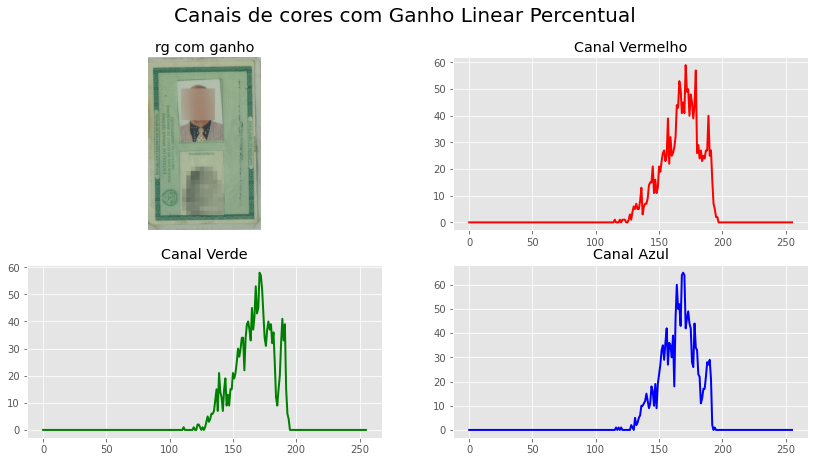

In [6]:
rg_lp = increase_brightness_linear_percent(rg_ruim, 35)
plot_histograms(rg_lp, 'rg com ganho', 'Canais de cores com Ganho Linear Percentual')

## 2.2 Ganho Linear

In [7]:
def increase_brightness_linear(img, gain):
    r, g, b = cv2.split(img)
    return cv2.merge((r+gain, g+gain, b+gain)).astype('uint8')

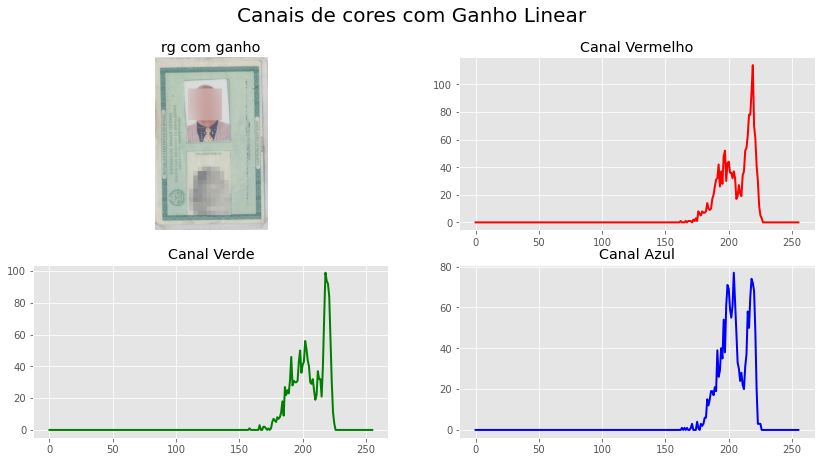

In [8]:
rg_l = increase_brightness_linear(rg_ruim, 50)
plot_histograms(rg_l, 'rg com ganho', 'Canais de cores com Ganho Linear')

## 2.3 Ganho Percentual

In [9]:
def increase_brightness_percent(img, percent):
    r, g, b = cv2.split(img)
    return cv2.merge((r*(percent*1.002989), g*(percent*1.005870), b*(percent*1.001140))).astype('uint8')

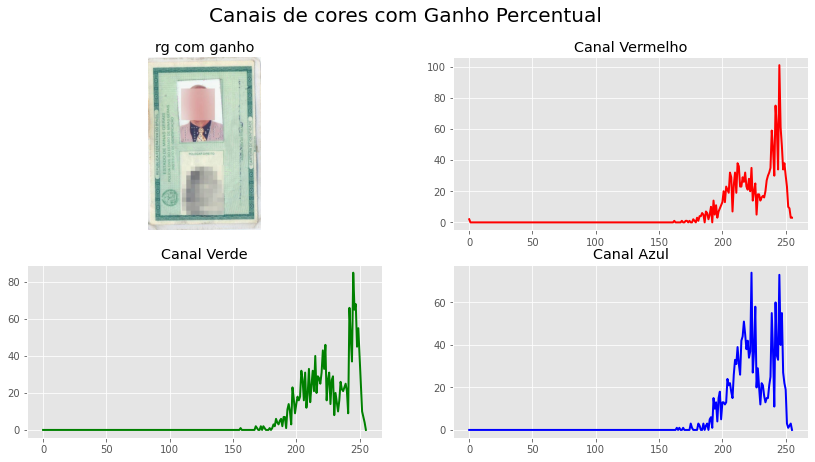

In [10]:
rg_p = increase_brightness_percent(rg_ruim, 1.45)
plot_histograms(rg_p, 'rg com ganho', 'Canais de cores com Ganho Percentual')

# 3. Comparações

In [11]:
documentos = {
    'rg_ruim' : {'matriz' : rg_ruim},
    'rg_bom' : {'matriz' : rg_bom},
    'rg_lp': {'matriz' : rg_lp},
    'rg_l' : {'matriz' : rg_l},
    'rg_p' : {'matriz' : rg_p}
}

In [12]:
for key, value in documentos.items():
    documentos[key]['hist_red'] = cv2.calcHist(documentos[key]['matriz'],[0],None,[256],[0,256])
    documentos[key]['hist_green'] = cv2.calcHist(documentos[key]['matriz'],[1],None,[256],[0,256])
    documentos[key]['hist_blue'] = cv2.calcHist(documentos[key]['matriz'],[2],None,[256],[0,256])

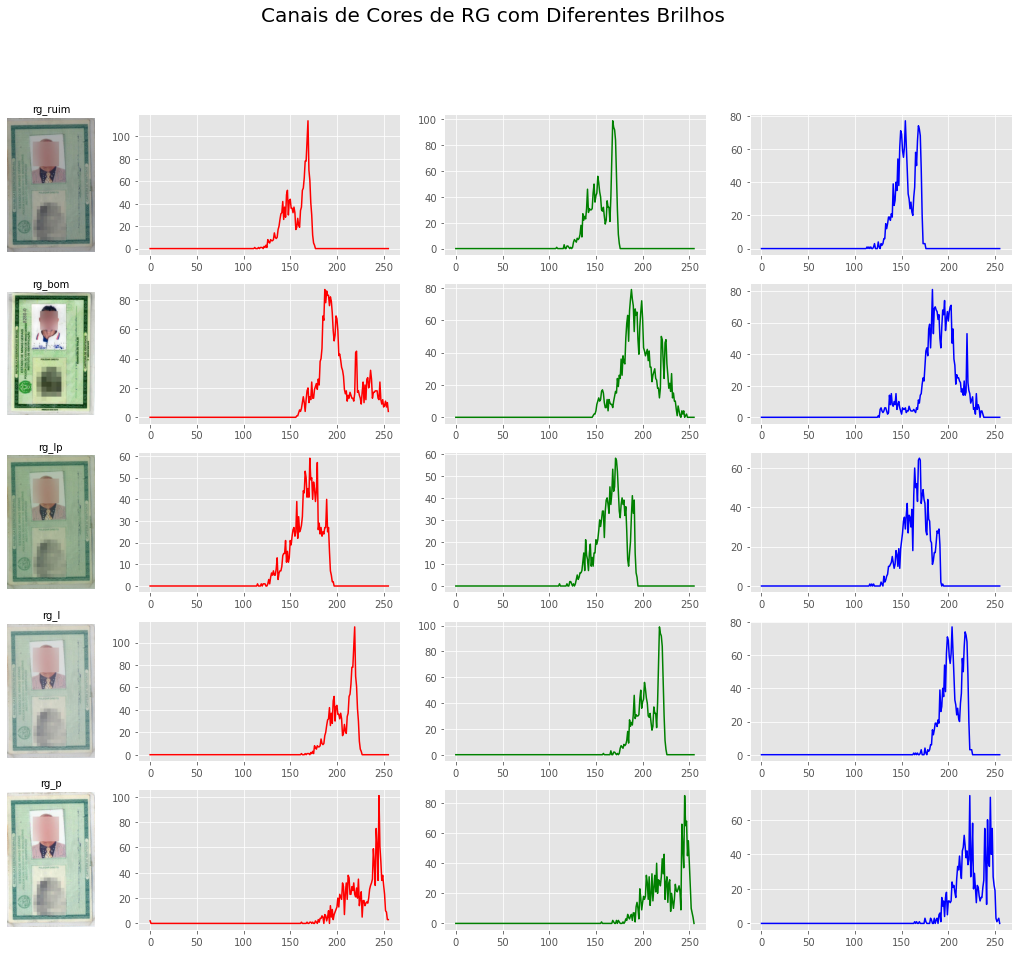

In [13]:
n = len(documentos.keys())
fig , ax = plt.subplots(n, 4, figsize=(18,3*n), gridspec_kw={'width_ratios': [1,3,3,3]})

cont = 0
ax.flatten()
ax = ax.T.flatten()
for key, value in documentos.items():
    ax[0+(cont)].imshow(value['matriz']); 
    ax[0+(cont)].axis('off'); ax[0+(cont)].set_title(key,fontsize=10)

    ax[n+(cont)].plot(value['hist_red'], color='red');
    ax[n*2+(cont)].plot(value['hist_green'], color='green')
    ax[n*3+(cont)].plot(value['hist_blue'], color='blue')
    cont+=1
    
fig.suptitle('Canais de Cores de RG com Diferentes Brilhos', fontsize=20)
plt.show()

# 4. Equalização CLAHE com Aumento de Brilho Percentual

In [14]:
def clahe_func(img):
    r, g, b = cv2.split(img)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    red = clahe.apply(r)
    green = clahe.apply(g)
    blue = clahe.apply(b)
    return cv2.merge((red, green, blue))

## 4.1 Ganho Percentual Aplicado ao Equalização CLAHE

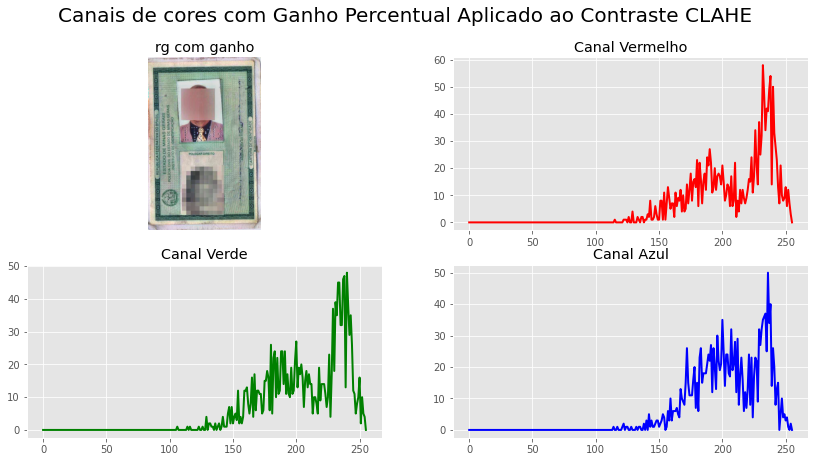

In [15]:
rg_clahe = clahe_func(rg_ruim)
rg_p = increase_brightness_percent(rg_clahe, 1.1)
plot_histograms(rg_p, 'rg com ganho', 'Canais de cores com Ganho Percentual Aplicado ao Contraste CLAHE')

## 4.2 Equalização CLAHE Aplicado ao Ganho Percentual

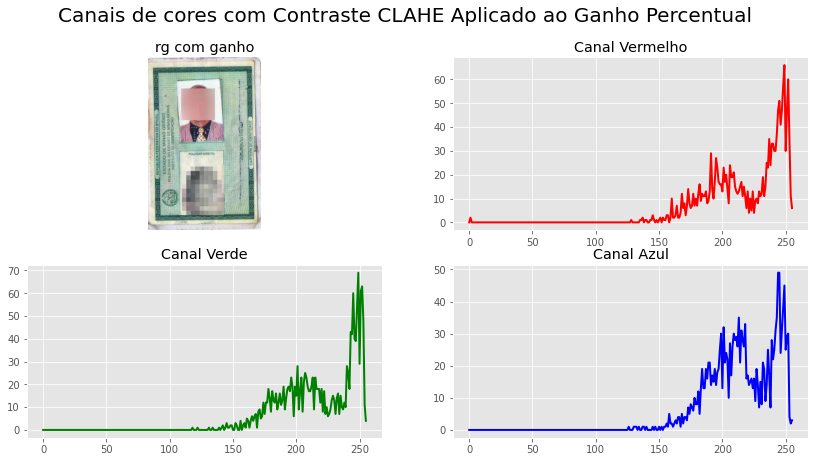

In [16]:
rg_p = increase_brightness_percent(rg_ruim, 1.45)
rg_clahe = clahe_func(rg_p)
plot_histograms(rg_clahe, 'rg com ganho', 'Canais de cores com Contraste CLAHE Aplicado ao Ganho Percentual')

# 5. Conclusão

Nesse teste verificamos os resultados dos diferentes métodos de aumento de brilho, onde dentre eles se destacou o método do aumento do brilho percentual. Outro resultado interessante foi a utlização da equalização CLAHE aplicada ao aumento percentual do brilho, onde a diferenciação de cores foi maiores e a nitidez do brilho foi menor, resultando em canais de cores mais espalhados. O método do aumento percentual do brilho  é bastante sensível aos valores de entrada da função, pois em seu cálculo há a multipplicação de cada canal de cor em x * percentual * o peso do referido canal na sua composição para visualização humana, dessa maneira, se utilizado em escala, o percentual deve ser bem ajustado. Já com o acrescimo da equalização, temos mais segurança de que os canais de cores não vai ficar tão saturados, e ainda assim conseguir uma boa correção na digitalização escura da imagem com canais de cores mais representativos.